In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l


In [4]:
def synthetic_data(w, b, num_examples):
    """生成 y = Xw + b + 噪声"""
    x = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(x,w) + b
    y += torch.normal(0, 0.01, y.shape)
    return x, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [5]:
print('features:',features[0],'\nlabel:', labels[0])

features: tensor([ 0.2957, -1.3709]) 
label: tensor([9.4745])


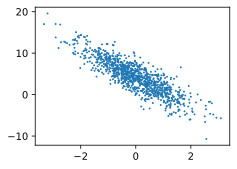

In [7]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),
               labels.detach().numpy(),1);

In [8]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定顺序
    random.shuffle(indices)#打乱indices中的下标
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i+ batch_size, num_examples)])# 最后可能超出范围，因此最大取到num_examples
        yield features[batch_indices], labels[batch_indices]
        
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.4069,  1.1882],
        [ 0.9832, -0.6627],
        [ 2.4816, -0.8339],
        [-0.6444,  0.4663],
        [-1.3270,  0.5074],
        [ 0.7252, -1.1497],
        [-0.2461, -0.3752],
        [ 1.4347,  0.0608],
        [ 0.1448, -0.3040],
        [-0.6396, -1.4392]]) 
 tensor([[-0.6407],
        [ 8.4203],
        [11.9841],
        [ 1.3423],
        [-0.1727],
        [ 9.5457],
        [ 4.9829],
        [ 6.8734],
        [ 5.5190],
        [ 7.7988]])


In [17]:
w = torch.normal(0, 0.01, size = (2,1),requires_grad = True)
b = torch.zeros(1, requires_grad = True)

In [10]:
def linreg(X,w,b):
    """线性回归模型"""
    return torch.matmul(X, w) + b

In [11]:
def squared_loss(y_hat, y):
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2


In [14]:
# 定义优化算法
def sgd(params, lr, batch_size): 
    """小批量随机梯度下降
        lr:学习率
    """
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [18]:
#训练过程
lr = 0.03
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b),y)
        l.sum().backward()
        sgd([w,b],lr, batch_size)
    
    with torch.no_grad():
        train_l = loss(net(features, w, b),labels)
        print(f'epoch{epoch + 1}, loss{float(train_l.mean()):f}')

epoch1, loss0.000055
epoch2, loss0.000057
epoch3, loss0.000088
epoch4, loss0.000069
epoch5, loss0.000063
epoch6, loss0.000053
epoch7, loss0.000062
epoch8, loss0.000071
epoch9, loss0.000080
epoch10, loss0.000085


In [16]:
print(f'w的估计误差：{true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b - b}')

w的估计误差：tensor([ 0.0004, -0.0002], grad_fn=<SubBackward0>)
b的估计误差：tensor([0.0010], grad_fn=<RsubBackward1>)
